In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = 'white')
sns.set (style = 'whitegrid', color_codes = True)

In [2]:
data = pd.read_csv("Wayfair-Babson_HackathonData 2019.csv")

In [3]:
data_deleted = data.drop(['State', 'UniqueVisitID', 'VisitDate', 'AddedToBasket'],axis = 1)

In [4]:
data_fillnan = data_deleted.fillna(method = 'ffill') # fill in the NaN using the row before the row with null value
data_fillasunknown = data_deleted.fillna("Unknown") # fill in the NaN using "Unknown"
data_fillall = data_deleted.replace("Unknown",np.nan).fillna(method = 'ffill') # replace "Unknown" using NaN, and fill in the NaN
data_deletenan = data_deleted.dropna(axis = 0,how = 'any') # drop all rows with null value
data_deleteall = data_deleted.replace("Unknown",np.nan).dropna(axis = 0,how = 'any') # drop all rows with null value or "Unknown" value
data_deleteage = data_deleted.drop(['Gender'],axis = 1) # drop Gender

In [5]:
#data_deleted.info()

In [6]:
data = data_deleted

In [7]:
#data.isnull().sum()

In [8]:
data_income = data.dropna(axis = 0, subset=['IncomeRange'])

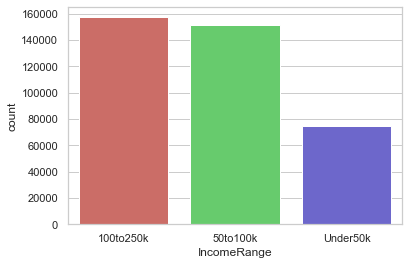

In [9]:
sns.countplot(x = 'IncomeRange', data = data_income, palette = 'hls')

In [10]:
# Divide data set into 3 groups
income_group = ['High_income', 'Med_income', 'Low_income']

High_income = data_income[data_income['IncomeRange'] == '100to250k'].drop(['IncomeRange'],axis = 1)
Med_income = data_income[data_income['IncomeRange'] == '50to100k'].drop(['IncomeRange'],axis = 1)
Low_income = data_income[data_income['IncomeRange'] == 'Under50k'].drop(['IncomeRange'],axis = 1)

In [11]:
#  Analyze price sensitivity of each data set

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [13]:
# Create dummy variables  
def create_dummy_income(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource',
                    'BrowserName', 'OSName', 'Gender']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df


def logistic_model(df):    
    df = create_dummy_income(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:,1:].values
    y = df.iloc[:,0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    #odd ratios only  
    print(summary)
    print(np.exp(clf.params))

logistic_model(High_income)
# Clicked Banner 6
# Addded to Basket 7

Index(['Purchased', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'Gender_Male', 'Gender_Unknown'],
      dtype='object')
         Current function value: 0.218379
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               110176
Model:                          Logit   Df Residuals:                   110155
Method:                           MLE   Df Model:                           20
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:               

/Users/tung491/workspace/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [14]:
# With High-income people, Clicked to Banner is not useful in predicting whether they will purchase or not
# It will actuall decrease the odd of purchase by 0.9 ( decrease)
# Among high-income people, GENDER is not useful in explaining whether you will buy or not
# if you are male, the odd that purchase is 1.0165 higher than a woman
# Among High income people, if you are using Web, the odd that you purchase is 1.2 higher compared to using phone 
# Among High income people, if come from Email, the odd that you purchase is 1.886 higher compared to from Thirparty, 
# and 2.77 higher compared to Web search  
# Profile of the money maker: Male, use Web, come from Email, High Income

In [15]:
logistic_model(Med_income)

Index(['Purchased', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'Gender_Male', 'Gender_Unknown'],
      dtype='object')
         Current function value: 0.210371
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               105770
Model:                          Logit   Df Residuals:                   105749
Method:                           MLE   Df Model:                           20
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:               

/Users/tung491/workspace/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [16]:
# With Med income people, the Clicked to Banner  is useful in explaining model
# Clicking rate increased the odd of purchase by 0.81 ( decrease)
# Among Med income people,gender does not matter
# Among Med income people, Web is useful in explaining whether you will purchase or not
# if you are using Web, the odd that you purchase is 1.2 higher compared to using phone 

In [17]:
logistic_model(Low_income)

Index(['Purchased', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'Gender_Male', 'Gender_Unknown'],
      dtype='object')
         Current function value: 0.213358
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                52343
Model:                          Logit   Df Residuals:                    52322
Method:                           MLE   Df Model:                           20
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:               

/Users/tung491/workspace/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [18]:
# With low income people, ViewedSaleinVisit, Seconds on Site, whether they use Web or not, Gender, any OS 
# are not useful in explaining whether they will purchase or not
# With low income people, the Clicked Banner rate increase the odd of purchase by 0.75 ( decrease)
# Among Low income people, if you are male, the odd that you purchase is 0.960 compared to women ( lower than women) 
# Among Low income people, if you are using Web, the odd that you purchase is 1.136 compared to using phone 

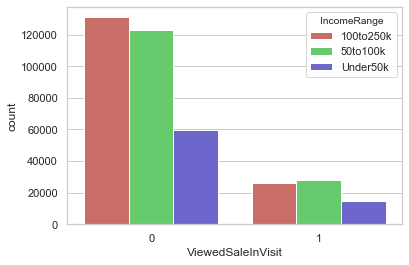

In [19]:
# Assume Viewed Sales meaning more interested in Sales
sns.countplot(x = 'ViewedSaleInVisit', data = data_income, hue = 'IncomeRange', palette = 'hls')

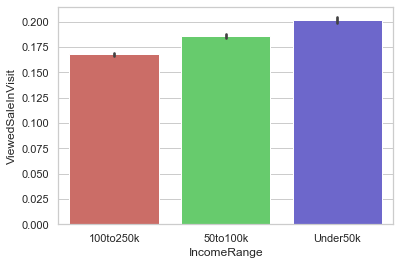

In [20]:
sns.barplot(x = 'IncomeRange', y = 'ViewedSaleInVisit', data = data_income, palette = 'hls')
# Low income people are more intested in Sales bc they have higher rate of viewing Sales 
#( high-income:16.5, Med income: 18.5, low income: 20%

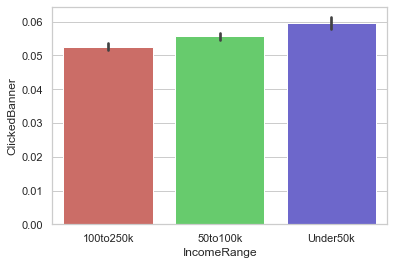

In [21]:
 sns.barplot(x = 'IncomeRange', y = 'ClickedBanner', data = data_income, palette = 'hls')
# Low income people are more likely to Click on the Banner (high-income:5.2%, Med income:5.5%, low income: 6% )
# This means the offer sales and using Banner will work better with low income people

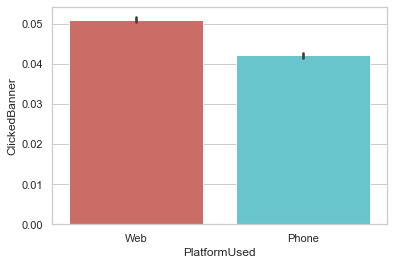

In [22]:
sns.barplot(x = 'PlatformUsed', y = 'ClickedBanner', data = data, palette = 'hls')
# People Click more when they are on the Web ( 5% Web vs. 4.1 % Phone)

In [23]:
#sns.barplot(x = 'PlatformUsed', y = 'AddedToBasket', data = data, palette = 'hls')
# Among all people, people Add to Basket almost at the same rate when they are on the phone and on the web, both 14.2 %

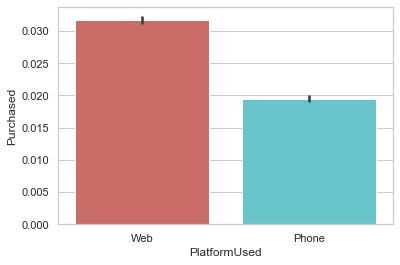

In [24]:
sns.barplot(x = 'PlatformUsed', y = 'Purchased', data = data, palette = 'hls')
# Among all people, people buy a lot more when they are on the Web( 3.2 %) compared to when they are on the phone (1.9%)
# same add to basket rate, but much lower purchase rate

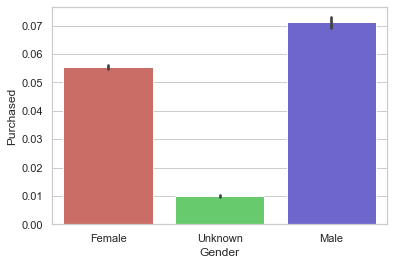

In [25]:
sns.barplot(x = 'Gender', y = 'Purchased', data = data, palette = 'hls')
# Among all, people purchase more when they are Male, 0.055 vs 0.07 ( 5.5% vs 7.1%)

In [26]:
data_income.columns

Index(['Purchased', 'VisitorGroup', 'PlatformUsed', 'VisitSource',
       'BrowserName', 'OSName', 'Gender', 'IncomeRange',
       'ViewedProductInVisit', 'ViewedSaleInVisit', 'TotalPageViews',
       'PlacedSearch', 'SecondsOnSite', 'ClickedBanner'],
      dtype='object')

In [27]:
# Split data set into phone user and web user
phone_user = data[data['PlatformUsed'] == 'Phone']
web_user = data[data['PlatformUsed'] == 'Web']
male = data[data['Gender'] == 'Male'].drop(['Gender'], axis=1)
female = data[data['Gender'] == 'Female'].drop(['Gender'], axis=1)

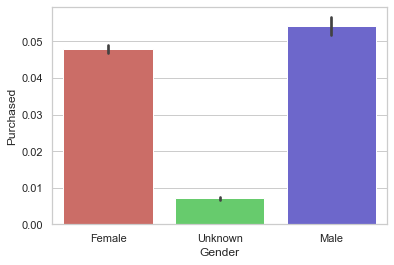

In [28]:
sns.barplot(x = 'Gender', y = 'Purchased', data = phone_user , palette = 'hls')
# Among all phone users, male purchase slightly more than women (0.054 vs. 0.047) or 5.4% vs 4.7%

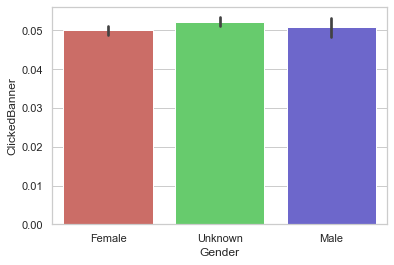

In [29]:
sns.barplot(x = 'Gender', y = 'ClickedBanner', data = phone_user, palette = 'hls')
# Among all phone users, male have the same click banner rate as women, 5%
# Male purchase more if they are using phone, they have the same rate of clicking like women on the banner.

In [30]:
#sns.barplot(x = 'Gender', y = 'ClickedBanner', data = web_user , palette = 'hls')
# Among all web users, women click to banner more( 6.1%) while men click on banner less 5.1%
# Male purchase more if they are using web, but they don't click Banner on the webas much as women.


In [31]:
def create_dummy_gender(df):
    category_vars= ['VisitorGroup', 'PlatformUsed', 'VisitSource','BrowserName', 'OSName','IncomeRange']
    df = pd.get_dummies(df, columns = category_vars, drop_first = True)
    return df


def logistic_model_gender(df):    
    df = create_dummy_gender(df)
    print(df.columns)
    logr = LogisticRegression()
    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 30)
    logr.fit(X_train,y_train)
    log_reg = sm.Logit(y_train, X_train)
    clf = log_reg.fit()
    column_names = list(df.columns)
    summary = clf.summary(xname = column_names[1:])
    #odd ratios only    
    print(summary)
    print(np.exp(clf.params))
    

In [32]:
logistic_model_gender(male)
# Among male, Clicking the Banner and Income Range 50to100k,  doesn't help explaning whether they purchase or not
# There is a dif. between high income and low income. If one is high income, the odd to buy is 1.20 higher compared to those of low income
# Which means Clicking banner doesn't matter to males
# Among males, using Web, Windows or iOS explain whether they purchase or not

Index(['Purchased', 'ViewedProductInVisit', 'ViewedSaleInVisit',
       'TotalPageViews', 'PlacedSearch', 'SecondsOnSite', 'ClickedBanner',
       'VisitorGroup_Prior Visitor',
       'VisitorGroup_Prior Visitor with Purchase', 'PlatformUsed_Web',
       'VisitSource_ThirdPartyAds', 'VisitSource_WebSearch',
       'BrowserName_Microsoft Edge', 'BrowserName_Safari', 'OSName_Chrome OS',
       'OSName_Linux', 'OSName_Mac OS X', 'OSName_Other/Unknown',
       'OSName_Windows', 'OSName_iOS', 'IncomeRange_50to100k',
       'IncomeRange_Under50k'],
      dtype='object')


/Users/tung491/workspace/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


         Current function value: 0.230497
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51075
Model:                          Logit   Df Residuals:                    51054
Method:                           MLE   Df Model:                           20
Date:                Mon, 13 Jan 2020   Pseudo R-squ.:                  0.1051
Time:                        12:21:42   Log-Likelihood:                -11773.
converged:                      False   LL-Null:                       -13155.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
ViewedProductInVisit                         0.9012      0.047     19.095      0.000

/Users/tung491/workspace/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
logistic_model_gender(female)

In [ ]:
# If you are Female, Clicked to Banner does explain whether you purchase or not.
# But clicked to Banner reduces the odd that you will purchase by 0.871 ( decrease)
# If you are female, if you are high income, the odd of you buying is 1.113 higher compared to mid income
# If you are female, if you are high income, the odd of you buying is 1.1 higher compared to low income
